# Social Media Analytics

In [3]:
import tweepy
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import pandas as pd
import spacy
from spacy import displacy

In [4]:
api_key = "3uj873csO0CJkdUzDlH7dM0xY"
api_secret = "hyKsFbBHBIHfPxzOiQ5RRNqSk8HbZIWxW3M2VfVDQuKs4uM2Nl"
access_token = "857530568-6DCJWOxpoSh0eUY8UQYsWulSnmqbmhSLf2d6XZWY"
access_token_secret = "M7U4QIEeoAaeRhTA9glHX6pxAM0BNEAeUCGpgnWTdyHJr"

In [5]:
auth = tweepy.OAuthHandler(api_key,api_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [34]:
tweets = api.search(q="Reliance jio",count=50,tweet_mode="extended")

In [42]:
clean_tweets=[]
sents = []
for tw in tweets:
    tw = tw.full_text
    tw = re.sub("RT\s","",tw)# removing RT from each tweet
    tw = re.sub("#","",tw)# removing # from each tweet
    tw = re.sub("@[a-zA-Z0-9_:]+","",tw) # removing twitter handles
    tw = re.sub("http[a-zA-Z0-9-.\/\%:]+","",tw) # remove URLS
    tw = tw.strip()
    if len(tw)>12:
        print(tw)
        tw = TextBlob(tw)
        try:
            if tw.detect_language()!='en':
                tw = tw.translate(to='en')
                print(tw)
        except:
            print("got some error")
        clean_tweets.append(tw.raw)

        if tw.sentiment.polarity>+0.1:
            print("Positive")
            sents.append("Positive")
        elif tw.sentiment.polarity<-0.1:
            print("Negative")
            sents.append("Negative")
        else:
            print("Neutral")
            sents.append("Neutral")
        print('***********************************************************')
        print("\n")

Just like PehlaPyaar, the first smartphone is super-special for everyone. itel A23 Pro packs a lot of SAHI features to mak…
Positive
***********************************************************


08- यूजर्स के साथ गद्दारी, बहुत पड़ेगी भारी reliance jio


jio_chor_hai
08- Betrayal with users, jio will have a lot of reliance


jio_chor_hai
Neutral
***********************************************************


jio Reliance भारत की नंबर वन कंपनी होने के बाद भी इतना घटिया काम कर रही है लोगों का डाटा चुरा रही है कुछ तो शर्म करो जिओ रि…
jio Reliance is doing such a poor job even after being the number one company of India, stealing people's data, do some shame jio re…
Negative
***********************************************************


08- यूजर्स के साथ गद्दारी, बहुत पड़ेगी भारी reliance jio


jio_chor_hai
08- Betrayal with users, jio will have a lot of reliance


jio_chor_hai
Neutral
***********************************************************


लोगों से की होशियारी, नियत जो न सुधारी
यूजर्स क

***********************************************************


Reliance Jio Emergency Data Loan Will Let You Browse Internet Even if You 
Exhaust it
data cybersecurity ai blockc…
Neutral
***********************************************************


Reliance Jio Emergency Data Loan Will Let You Browse Internet Even if You 
Exhaust it
data cybersecurity ai blockc…
Neutral
***********************************************************


Reliance Jio Emergency Data Loan Will Let You Browse Internet Even if You 
Exhaust it
data cybersecurity ai blockchain databreach privacy infosec security 
encryption gdpr dataprotection cyberattack gdpr cloudsecurity 
datasecurity
Neutral
***********************************************************


In February 2019, The Caravan's cover story reported how government decisions are helping Reliance Jio monopolise the…
Neutral
***********************************************************


RELIANCE JIO - 3GB RS3499 -  innovation marketing ai cybersecurity 
machine

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


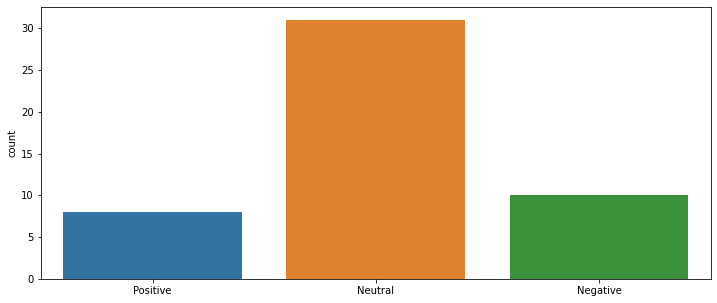

In [43]:
plt.figure(figsize=(12,5))
sns.countplot(sents)
plt.show()

### Wordcloud Analysis

In [44]:
df = pd.DataFrame({'tweets':clean_tweets,"sents":sents})
df.head()

,tweets,sents
0,"Just like PehlaPyaar, the first smartphone is ...",Positive
1,"08- Betrayal with users, jio will have a lot o...",Neutral
2,jio Reliance is doing such a poor job even aft...,Negative
3,"08- Betrayal with users, jio will have a lot o...",Neutral
4,"The wisdom of the people, the intention that d...",Negative


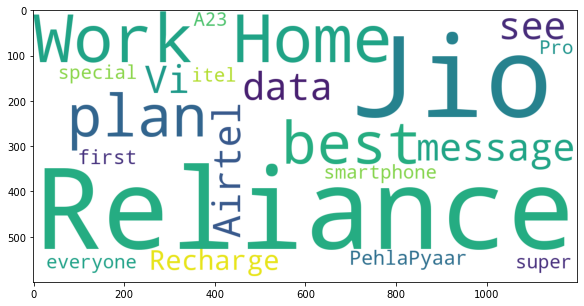

In [45]:
ptweets = df.tweets[df.sents=='Positive'].tolist()

wd = wordcloud.WordCloud(background_color='white',width=1200,height=600,
                        max_words=20).generate_from_text(" ".join(ptweets))

plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

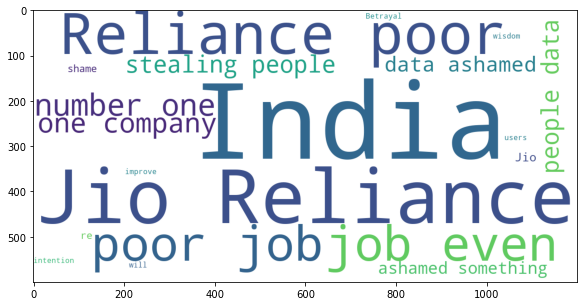

In [46]:
ntweets = df.tweets[df.sents=='Negative'].tolist()

wd = wordcloud.WordCloud(background_color='white',width=1200,height=600,
                        max_words=20).generate_from_text(" ".join(ntweets))

plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

### NER Analysis = Named Entity Recognition

In [50]:
nlp = spacy.load('en_core_web_sm')
doc = nlp("John purchased a watch from a street close to State Bank of India, Bandra and gifted it on last sunday to his friend Deepak Singh from Delhi.")

displacy.render(doc,style='ent',jupyter = True)

In [48]:
for tw in ptweets:
    tw = nlp(tw)
    displacy.render(tw,style='ent',jupyter = True)

In [49]:
for tw in ntweets:
    tw = nlp(tw)
    displacy.render(tw,style='ent',jupyter = True)

# Working with textblob

In [23]:
data = TextBlob("Hello Everyone, Hope you are enjoying Machine Learning.")

In [24]:
data.detect_language()

'en'

In [25]:
data.translate(to='hi')

TextBlob("सभी को नमस्कार, आशा है कि आप मशीन लर्निंग का आनंद ले रहे होंगे।")

In [26]:
data.translate(to='te')

TextBlob("అందరికీ హలో, మీరు యంత్ర అభ్యాసాన్ని ఆనందిస్తున్నారని ఆశిస్తున్నాను.")

In [27]:
data.translate(to='ar')

TextBlob("مرحبًا بالجميع ، آمل أن تكونوا مستمتعين بتعلم الآلة.")

In [28]:
data = TextBlob("the movie was awesome and i love such movies")
data.sentiment.polarity

0.5

In [29]:
data = TextBlob("the movie was bad and i hate such movies")
data.sentiment.polarity

-0.5

In [30]:
data = TextBlob("the movie was worst and i hate such movies")
data.sentiment.polarity

-0.6